# Supermarket Sales - Global Explanations
- Andrea Cohen
- 03.23.23

## Data:
- Original data source
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

## Data Dictionary:

Variable Name | Description
---| ---
Item_Identifier| Unique product ID
Item_Weight| Weight of product
Item_Fat_Content| Whether the product is low fat or regular
Item_Visibility| The percentage of total display area of all products in a store allocated to the particular product
Item_Type| The category to which the product belongs
Item_MRP| Maximum Retail Price (list price) of the product
Outlet_Identifier| Unique store ID
Outlet_Establishment_Year| The year in which store was established
Outlet_Size| The size of the store in terms of ground area covered
Outlet_Location_Type| The type of area in which the store is located
Outlet_Type| Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales| Sales of the product in the particular store. This is the target variable to be predicted.



## Preliminary steps

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap
shap.initjs()

### Load the data

In [2]:
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', 'LinearRegression', 'DecisionTreeRegressor'])

In [3]:
preprocessor = loaded_joblib['preprocessor']
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
LinearRegression = loaded_joblib['LinearRegression']
DecisionTreeRegressor = loaded_joblib['DecisionTreeRegressor']

## Explain the tree-based model with shap

### Create an X_shap and y_shap variable from the training data

In [4]:
# check the length of the X data
len(X_train)

6392

In [5]:
# sample a subset of the data
X_shap = shap.sample(X_train, nsamples = 500, random_state = 321)

In [6]:
# use the index of X_shap to slice out the corresponding y data 
y_shap = y_train.loc[X_shap.index]

### Create a model explainer

In [7]:
explainer = shap.Explainer(DecisionTreeRegressor)
explainer

### Calculate the shap values for the model

In [8]:
shap_values = explainer(X_shap, y_shap)
shap_values.shape

(500, 35)

In [9]:
X_shap.shape

(500, 35)

- the shape of the shap values is the same as the X data

### Summary Plot - Bar

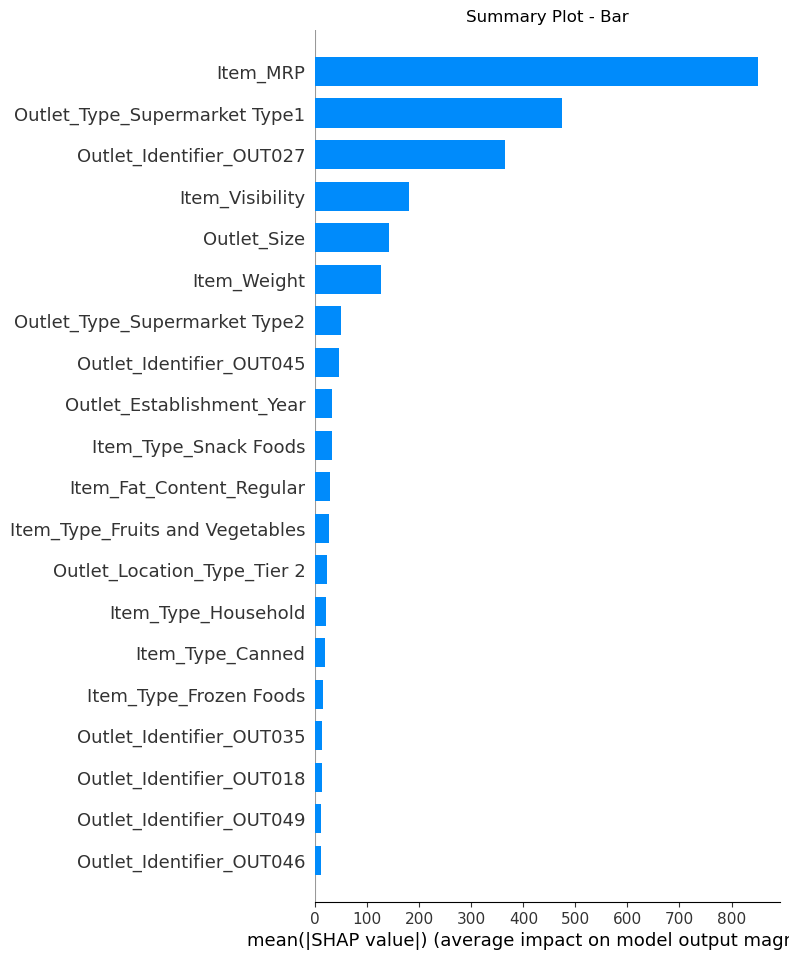

In [10]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type = 'bar', show = False)
ax.set_title('Summary Plot - Bar');
fig.savefig('Images/Summary_Plot_Bar.png')

- The most important features according to SHAP are:
    - Item_MRP
    - Outlet_Type_Supermarket Type 1
    - Outlet_Identifier_OUT027
    - Item_Visibility
    - Outlet_Size
    

.![png](./Images/Top%2015%20Most%20Important%20Features.png)

- The most important features according to the model are:
    - Item_MRP
    - Item_Visibility
    - Outlet_Identifier_OUT027
    - Outlet_Type_Supermarket Type 1
    - Outlet_Size

- Both SHAP and the model used Item_MRP as the most important feature for separating the data to predict the item outlet sales.
- The next 4 most important features were the same for SHAP and for the model, but in different orders of importance.
    - SHAP used Outlet_Type_Supermarket Type 1 as the second most important feature, but the model used Item_Visibility as the second most important feature.
    - Both SHAP and the model used Outlet_Identifier_OUT027 as the third most important feature.
    - SHAP used Item_Visibility as the fourth most important feature, but the model used Outlet_Type_Supermarket Type 1 as the fourth most important feature.
    - Both SHAP and the model used Outlet_Size as the fifth most important feature.
- SHAP used Outlet_Type_Supermarket Type 1 as more important than Outlet_Size, but the model used Outlet_Size as more important than Outlet_Type_Supermarket Type 1.

### Summary Plot - dot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


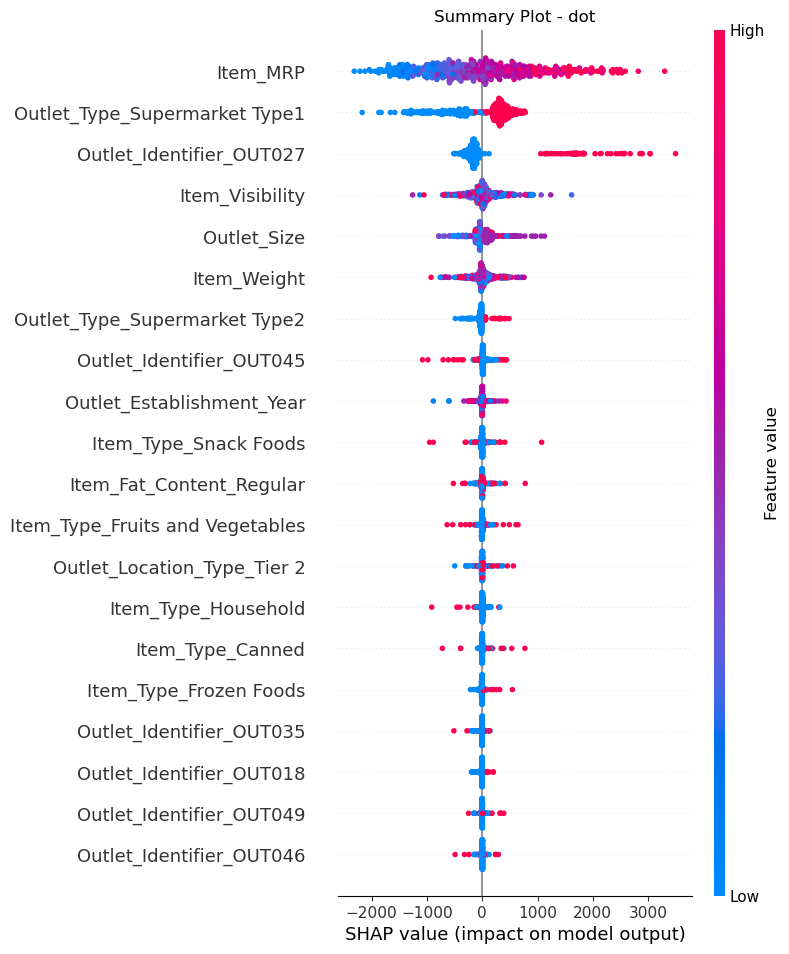

In [11]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, show = False)
ax.set_title('Summary Plot - dot');
fig.savefig('Images/Summary_Plot_dot.png')

- The 3 most important features according to SHAP are Item_MRP, Outlet_Type_Supermarket Type 1, and  Outlet_Identifier_OUT027.
    - Item_MRP
        - The red values are on the right (positive).  The greater the maximum retail price of an item, the higher the model will predict as the item outlet sales.
        - The blue values are on the left (negative).  The smaller the maximum retail price of an item, the lower the model will predict as the item outlet sales.
    - Outlet_Type_Supermarket Type 1
        - The red values are on the right (positive).  If the item is sold at a Supermarket Type 1, the model will predict higher sales.
        - The blue values are on the left (negative).  If the item is sold at a different outlet type, the model will predict lower sales.
    - Outlet_Identifier_OUT027
        - The red values are on the right (positive).  If the item is sold at Outlet OUT027, the model will predict higher sales.
        - The blue values are on the left (negative).  If the item is sold at any other outlet, the model will predict lower sales.
        
        

## Local Explanations

### Item_MRP


- The maximum retail price of an item was the most important feature for both SHAP and the model.  It would be helpful to choose an item with low MRP and an item with high MRP.

### Outlet_Type_Supermarket Type 1

- The type of outlet was among the most important features for both SHAP and the model.  It would be helpful to choose an example from a Type 1 Supermarket.